In [1]:
#from sklearn.model_selection import cross_val_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph. I like it most for plot
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model
#from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("data.csv") ### Cancer dataset

In [3]:
df.head() # displaying first 5 rows of the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
## checking if any null vaklues exist in the data
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# dimension
df.shape

(569, 33)

In [7]:
#df = df.drop('id',inplace=True, axis=1) ### dropping ID variable
df = df.iloc[:,1:32]

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
#df.corr()['radius_mean'].sort_values(ascending=False)
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [11]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0}) # converting text lables to numbers

In [12]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
#prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [66]:
#x = df[prediction_var]
x=df.iloc[:,1:]

In [67]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [68]:
y = df.diagnosis
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [69]:
# x = df.iloc[:,1:] # spilitting features
# #x = df[['perimeter_mean','compactness_mean']]
# y= df.diagnosis # Labels

In [70]:
#!pip install -U imbalanced-learn

In [71]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_smote, y_smote = smt.fit_sample(x, y)

In [72]:
print (x.shape)
    
print (X_smote.shape)

(569, 30)
(714, 30)


In [75]:
y_smote.value_counts()

1    357
0    357
Name: diagnosis, dtype: int64

In [73]:
df.shape

(569, 31)

In [74]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
357/569

In [76]:
from sklearn.model_selection import train_test_split
#testing data size is of 20% of entire data
x_train, x_test, y_train, y_test =train_test_split(X_smote,y_smote,test_size = 0.20, random_state=5) # train test split

In [77]:
x_train.shape


(571, 30)

In [99]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
354,11.14,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,0.1690,0.06083,...,12.12,15.82,79.62,453.5,0.08864,0.1256,0.1201,0.03922,0.2576,0.07018
510,11.74,14.69,76.31,426.0,0.08099,0.09661,0.06726,0.02639,0.1499,0.06758,...,12.45,17.60,81.25,473.8,0.10730,0.2793,0.2690,0.10560,0.2604,0.09879
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.1017,0.0626,0.08216,0.2136,0.06710
545,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.35,29.09,97.58,729.8,0.12160,0.1517,0.1049,0.07174,0.2642,0.06953
366,20.20,26.83,133.70,1234.0,0.09905,0.16690,0.16410,0.12650,0.1875,0.06020,...,24.19,33.81,160.00,1671.0,0.12780,0.3416,0.3703,0.21520,0.3271,0.07632


In [78]:
x_test.shape

(143, 30)

In [79]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [80]:
357/569

0.6274165202108963

In [81]:
y_train.value_counts()

1    290
0    281
Name: diagnosis, dtype: int64

In [25]:
291/455

0.6395604395604395

In [26]:
y= pd.DataFrame(y_train)

In [27]:
y.head()

,diagnosis
306,0
410,0
197,1
376,0
244,1


In [82]:
logistic = LogisticRegression().fit(x_train,y_train)

c:\users\shivu\anaconda3\envs\tensorflow1.5\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [100]:
logistic.coef_

array([[-3.55535565e-01, -1.74797592e-01, -7.23125979e-01,
         3.10620039e-02,  7.37119646e-03,  4.44541208e-02,
         6.32891983e-02,  2.58524499e-02,  9.47116132e-03,
         1.39810783e-03, -1.02276695e-02, -1.19918116e-01,
         6.59461126e-02,  1.11210029e-01,  5.43223714e-04,
         1.03729823e-02,  1.38390143e-02,  3.40825169e-03,
         1.79400333e-03,  7.13592063e-04, -3.59553683e-01,
         3.46610215e-01,  4.34498973e-01,  3.13517118e-03,
         1.55817174e-02,  1.60772264e-01,  1.95261348e-01,
         5.43134569e-02,  3.81441826e-02,  1.34577194e-02]])

In [101]:
logistic.intercept_

array([-0.06069334])

In [102]:
x_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [103]:
odds_ratio = np.exp(logistic.coef_)
odds_ratio


array([[0.70079802, 0.83962695, 0.48523305, 1.03154946, 1.00739843,
        1.04545701, 1.06533489, 1.02618952, 1.00951615, 1.00139909,
        0.98982446, 0.88699306, 1.06816915, 1.11762962, 1.00054337,
        1.01042697, 1.01393522, 1.00341407, 1.00179561, 1.00071385,
        0.69798778, 1.41426536, 1.54418919, 1.00314009, 1.01570375,
        1.17441748, 1.21562865, 1.0558155 , 1.03888101, 1.01354868]])

In [104]:
np.exp(logistic.intercept_)

array([0.9411118])

In [86]:
pred =logistic.predict(x_test)

In [87]:
pred[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [88]:
y_test[:10]

629    1
89     0
71     0
37     0
427    0
444    1
654    1
203    1
104    0
23     1
Name: diagnosis, dtype: int64

In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
confusion_matrix(y_test,pred)

array([[74,  2],
       [ 2, 65]], dtype=int64)

In [91]:
tn, fp, fn, tp= confusion_matrix(y_test,pred).ravel()

In [92]:
tp

65

In [93]:
tn

74

In [94]:
fp

2

In [95]:
fn

2

In [96]:
66/71

0.9295774647887324

In [97]:
43/(43+0)

1.0

In [98]:
from sklearn.metrics import mean_absolute_error,accuracy_score,classification_report,confusion_matrix 
print('Accuracy:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred, digits=3))

Accuracy: 0.972027972027972
              precision    recall  f1-score   support

           0      0.974     0.974     0.974        76
           1      0.970     0.970     0.970        67

    accuracy                          0.972       143
   macro avg      0.972     0.972     0.972       143
weighted avg      0.972     0.972     0.972       143



In [45]:
pred_y = logistic.predict_proba(x_test)

In [46]:
pred_y

array([[8.85599116e-07, 9.99999114e-01],
       [9.92582719e-01, 7.41728130e-03],
       [9.84037100e-01, 1.59629001e-02],
       [9.79583320e-01, 2.04166799e-02],
       [8.71951864e-01, 1.28048136e-01],
       [0.00000000e+00, 1.00000000e+00],
       [9.39977361e-01, 6.00226387e-02],
       [9.97568849e-01, 2.43115113e-03],
       [5.59998989e-01, 4.40001011e-01],
       [9.94442572e-01, 5.55742819e-03],
       [9.68046106e-01, 3.19538936e-02],
       [9.86295845e-01, 1.37041555e-02],
       [4.96965136e-10, 1.00000000e+00],
       [9.97587400e-01, 2.41259992e-03],
       [9.94399869e-01, 5.60013105e-03],
       [9.88513212e-01, 1.14867880e-02],
       [9.90389748e-01, 9.61025235e-03],
       [9.97757247e-01, 2.24275300e-03],
       [9.91817380e-01, 8.18262023e-03],
       [9.70162150e-01, 2.98378502e-02],
       [6.73176056e-01, 3.26823944e-01],
       [9.98226685e-01, 1.77331534e-03],
       [9.38212308e-01, 6.17876919e-02],
       [9.96600762e-01, 3.39923837e-03],
       [9.941596

In [47]:
y_prob = pred_y[:,1]

In [48]:
y_prob ## probability for class 1

array([9.99999114e-01, 7.41728130e-03, 1.59629001e-02, 2.04166799e-02,
       1.28048136e-01, 1.00000000e+00, 6.00226387e-02, 2.43115113e-03,
       4.40001011e-01, 5.55742819e-03, 3.19538936e-02, 1.37041555e-02,
       1.00000000e+00, 2.41259992e-03, 5.60013105e-03, 1.14867880e-02,
       9.61025235e-03, 2.24275300e-03, 8.18262023e-03, 2.98378502e-02,
       3.26823944e-01, 1.77331534e-03, 6.17876919e-02, 3.39923837e-03,
       5.84038576e-03, 1.47371291e-01, 4.14146695e-01, 9.99999995e-01,
       5.84305766e-02, 9.99983644e-01, 1.00000000e+00, 9.99822044e-01,
       7.20439845e-01, 9.73924138e-01, 4.25679057e-04, 5.16442105e-04,
       9.99936400e-01, 8.94794193e-03, 6.69916010e-03, 1.00000000e+00,
       2.49571206e-02, 1.35138771e-02, 6.21696845e-04, 9.99990682e-01,
       1.26428475e-02, 1.94789451e-03, 9.95974495e-01, 9.99998268e-01,
       4.00183377e-03, 1.00000000e+00, 1.20820544e-01, 9.43960099e-04,
       2.16743647e-02, 5.78266703e-02, 7.40655877e-02, 1.00000000e+00,
      

In [49]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)

In [50]:
fpr

array([0.        , 0.        , 0.        , 0.01515152, 0.01515152,
       0.03030303, 0.03030303, 0.06060606, 0.06060606, 0.12121212,
       0.12121212, 1.        ])

In [51]:
tpr

array([0.        , 0.10416667, 0.91666667, 0.91666667, 0.9375    ,
       0.9375    , 0.95833333, 0.95833333, 0.97916667, 0.97916667,
       1.        , 1.        ])

In [52]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 4.91923303e-01, 4.40001011e-01,
       4.14146695e-01, 3.68482909e-01, 3.26823944e-01, 1.98482398e-01,
       1.62772232e-01, 8.51607659e-02, 8.22918534e-02, 2.77180638e-04])

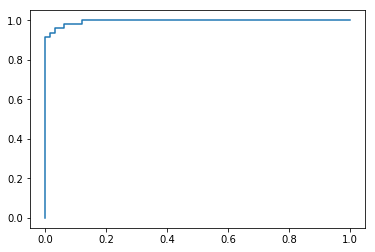

In [53]:
plt.plot(fpr,tpr)
plt.show()

In [54]:
tpr-fpr

array([0.        , 0.10416667, 0.91666667, 0.90151515, 0.92234848,
       0.90719697, 0.9280303 , 0.89772727, 0.91856061, 0.85795455,
       0.87878788, 0.        ])

In [55]:
optimal_idx = np.argmax(tpr-fpr)

In [56]:
thresholds[optimal_idx]

0.32682394377914087

In [57]:
metrics.auc(fpr,tpr)

0.9952651515151515

In [58]:
#print(logistic.score(x_test,y_test, sample_weight=None))

In [59]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

threshold = Find_Optimal_Cutoff(y_test,y_prob)

c:\users\shivu\anaconda3\envs\tensorflow1.5\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


In [60]:
threshold

[0.32682394377914087]

### Additional Material
https://online.stat.psu.edu/stat504/node/149/

## Decision Tree Classifier

#####  maths behind decision tree
https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3#:~:text=Feature%20Importance-,Feature%20importance%20is%20calculated%20as%20the%20decrease%20in%20node%20impurity,the%20more%20important%20the%20feature.


##### Cost complexity Pruning

https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/#:~:text=Minimal%20Cost%2DComplexity%20Pruning%20is,known%20as%20the%20complexity%20parameter.&text=where%20%7CT%7C%20is%20the%20number,rate%20of%20the%20terminal%20nodes.

##### printing decision tree

https://mljar.com/blog/visualize-decision-tree/


In [106]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score

In [107]:
x = df.iloc[:,1:]
y = df.diagnosis

In [108]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [109]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.20, random_state=5) # train test split

In [128]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train, sample_weight=None, check_input=True, X_idx_sorted=None)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [129]:
print(clf.score(x_test,y_test, sample_weight=None))

0.9473684210526315


In [130]:
pred = clf.predict(x_test)
pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0], dtype=int64)

In [131]:
from sklearn.metrics import mean_absolute_error,accuracy_score,classification_report,confusion_matrix 
print('Accuracy:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred, digits=3))

Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0      0.941     0.970     0.955        66
           1      0.957     0.917     0.936        48

    accuracy                          0.947       114
   macro avg      0.949     0.943     0.946       114
weighted avg      0.948     0.947     0.947       114



In [132]:
x_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [133]:
clf.feature_importances_

array([0.00715049, 0.        , 0.01906797, 0.        , 0.02933534,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00231287, 0.        , 0.        , 0.01375069, 0.        ,
       0.        , 0.00476699, 0.00855945, 0.        , 0.        ,
       0.        , 0.00949554, 0.01288845, 0.14283205, 0.02339374,
       0.        , 0.02587256, 0.69115456, 0.00941927, 0.        ])

In [ ]:
# from sklearn import tree
# tree.plot_tree(clf.fit(x_train,y_train))

In [ ]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# from sklearn import tree

In [ ]:
# dot_data = StringIO()
# tree.export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [ ]:
#Image(graph.create_png())

In [ ]:
#confusion_matrix(y_test, pred)

In [135]:
#clf.predict_proba(x_test)

## Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
x_train.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
306,13.20,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.41,20.45,92.00,636.9,0.11280,0.1346,0.0112,0.02500,0.2651,0.08385
410,11.36,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.021000,0.1601,0.05913,...,13.05,36.32,85.07,521.3,0.14530,0.1622,0.1811,0.08698,0.2973,0.07745
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558
376,10.57,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.059410,0.2188,0.08450,...,10.85,22.82,76.51,351.9,0.11430,0.3619,0.6030,0.14650,0.2597,0.12000
244,19.40,23.50,129.10,1155.0,0.10270,0.15580,0.204900,0.088860,0.1978,0.06000,...,21.65,30.53,144.90,1417.0,0.14630,0.2968,0.3458,0.15640,0.2920,0.07614


In [138]:
y_train[:5]

306    0
410    0
197    1
376    0
244    1
Name: diagnosis, dtype: int64

In [139]:
#RandomForest classifier
model=RandomForestClassifier(n_estimators=500,criterion="gini",oob_score=True)# a simple random forest model
model.fit(x_train,y_train)# now fit our model for traiing data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [140]:
pred= model.predict(x_test)

In [141]:
from sklearn.metrics import mean_absolute_error,accuracy_score,classification_report,confusion_matrix 
print('Accuracy:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred, digits=3))

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0      0.957     1.000     0.978        66
           1      1.000     0.938     0.968        48

    accuracy                          0.974       114
   macro avg      0.978     0.969     0.973       114
weighted avg      0.975     0.974     0.974       114



In [ ]:
#print(metrics.accuracy_score(pred_rf,y_test)) # to check the accuracy

In [146]:
model.oob_score_ ### Accurcay of validation data

0.9472527472527472

In [143]:
model.feature_importances_

array([0.04077626, 0.01377697, 0.05083971, 0.04951878, 0.00748472,
       0.01061999, 0.05777376, 0.10870751, 0.00350824, 0.00399991,
       0.01253001, 0.00478561, 0.01594953, 0.03519877, 0.00382553,
       0.00503297, 0.00462915, 0.00328126, 0.00427888, 0.00484834,
       0.10239792, 0.01867484, 0.11807929, 0.11420318, 0.01443332,
       0.01337707, 0.04390616, 0.11665072, 0.00952909, 0.0073825 ])

In [ ]:
df.columns

In [144]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)

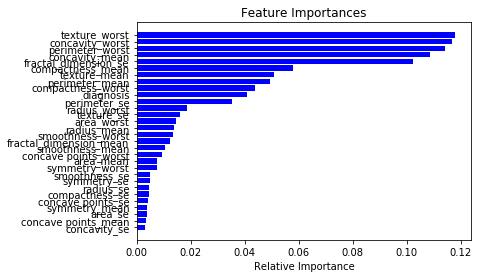

In [145]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Naive Bayes Implementation

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(x_train,y_train)

In [ ]:
y_train.value_counts()

In [ ]:
291/(291+164)

In [ ]:
nb.class_prior_

In [ ]:
pred_nb = nb.predict(x_test)

In [ ]:
pred_nb

In [ ]:
pred_nb_prob = nb.predict_proba(x_test)
pred_nb_prob[:,1]
#pred_nb_prob

In [ ]:
from sklearn.metrics import mean_absolute_error,accuracy_score,classification_report,confusion_matrix 
print('Accuracy:', accuracy_score(y_test, pred_nb))
print(classification_report(y_test, pred, digits=3))

In [ ]:
confusion_matrix(y_test, pred_nb)

In [ ]:
print(metrics.accuracy_score(pred_nb,y_test)) # to check the accuracy

In [ ]:
#nb.score(x_test,y_test)

### Implementing SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
x_train.head()

In [ ]:
model_svm = SVC(kernel='rbf',C=0.1)
model_svm.fit(x_train,y_train)

In [ ]:
pred_svm = model_svm.predict(x_test)

In [ ]:
pred_svm

In [ ]:
print(metrics.accuracy_score(pred_svm,y_test)) # to check the accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 1],
                     'C': [0.1,1, 100,1000]}, {'kernel': ['linear'], 'C': [0.01,1, 100,1000]}]

In [ ]:
clf = GridSearchCV(SVC(), tuned_parameters, cv=2)
clf.fit(x_train, y_train)

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_